In [16]:
import pandas as pd

df = pd.read_csv(
    "hathi_full_20251201.txt.gz",
    sep="\t",
    header=None,
    compression="gzip",
    nrows=100_000,
    low_memory=False
)

df.columns = [
    "htid",
    "access",
    "rights",
    "ucla_id",
    "volume",
    "orig",
    "oclc",
    "record_id",
    "isbn",
    "issn",
    "lccn",
    "title",
    "imprint",
    "bib_fmt",
    "last_update",
    "enumcron",
    "source",
    "language_raw",
    "language",
    "bib_level",
    "country",
    "orig_code",
    "catalog",
    "digitization",
    "digitization2",
    "author"
]


In [18]:
df.head(3)
df.dtypes
df["bib_level"].value_counts().head()
df["language"].value_counts().head()

language
eng    77248
ger    10526
fre     4896
spa     2925
dut     1022
Name: count, dtype: int64

In [19]:
df.iloc[0].to_dict()


{'htid': 'mdp.39015018415946',
 'access': 'deny',
 'rights': 'ic',
 'ucla_id': 1,
 'volume': 'v.5',
 'orig': 'MIU',
 'oclc': '990000000010106381',
 'record_id': '2779601',
 'isbn': '8081281584,9788081281587',
 'issn': nan,
 'lccn': '70518371',
 'title': 'Slovenské vyst̕ahovalectvo / Zost. František Bielik a Elo Rákoš.',
 'imprint': 'Matica Slovenská, SAV, t. Svornost̕, 1969-',
 'bib_fmt': 'bib',
 'last_update': '2011-09-15 04:30:52',
 'enumcron': 0,
 'source': 9999,
 'language_raw': 'xo ',
 'language': 'slo',
 'bib_level': 'BK',
 'country': 'MIU',
 'orig_code': 'umich',
 'catalog': 'umich',
 'digitization': 'google',
 'digitization2': 'google',
 'author': 'Bielik, František,'}

In [ ]:
import re

def extract_year(imprint):
    if pd.isna(imprint):
        return None
    m = re.search(r"(1[0-9]{3}|[2-9][0-9]{3})", imprint)
    return int(m.group(1)) if m else None

df["year"] = df["imprint"].apply(extract_year)

# livres uniquement
df = df[df["bib_level"] == "BK"]

# pré-1800
df_pre1800 = df[df["year"] < 1800]


In [22]:
df_pre1800

,htid,access,rights,ucla_id,volume,orig,oclc,record_id,isbn,issn,...,language_raw,language,bib_level,country,orig_code,catalog,digitization,digitization2,author,year
7545,mdp.39015063864113,allow,pd,5677,v.1,MIU,990000056770106381,405086,NaN,NaN,...,enk,eng,BK,MIU,umich,umich,google,google,"Conybeare, John, 1692-1755.",1757.0
7546,mdp.39015063864121,allow,pd,5677,v.2,MIU,990000056770106381,405086,NaN,NaN,...,enk,eng,BK,MIU,umich,umich,google,google,"Conybeare, John, 1692-1755.",1757.0
7871,uc1.$b783572,allow,pd,5891,NaN,UC,b170124423,421852,NaN,NaN,...,xx,ger,BK,NRLF,universityofcalifornia,universityofcalifornia,google,google,"Rost, Johann Leonhard, 1688-1727.",1721.0
7872,uiug.30112068806907,allow,pd,5891,NaN,UIU,2720168,421852,NaN,NaN,...,xx,ger,BK,UIUC,illinois,illinois,google,google,"Rost, Johann Leonhard, 1688-1727.",1721.0
7873,mdp.39015030137155,allow,pd,5891,NaN,MIU,990000058910106381,421852,NaN,NaN,...,xx,ger,BK,MIU,umich,umich,google,google,"Rost, Johann Leonhard, 1688-1727.",1721.0
7874,hvd.32044087299905,allow,pd,5891,NaN,HVD,990035512020203941,421852,NaN,NaN,...,xx,ger,BK,HVD,harvard,harvard,google,google,"Rost, Johann Leonhard, 1688-1727.",1721.0
15161,mdp.39015012375997,allow,pd,11493,v.2,MIU,990000114930106381,15936418,NaN,NaN,...,stk,eng,BK,MIU,umich,umich,google,google,"Abercromby, Patrick, 1656-1716?",1711.0
15162,mdp.39015012364504,allow,pd,11493,v.1,MIU,990000114930106381,15936418,NaN,NaN,...,stk,eng,BK,MIU,umich,umich,lit-dlps-dc,open,"Abercromby, Patrick, 1656-1716?",1711.0
15163,nyp.33433000015499,allow,pd,11493,v. 2,NYP,b130518074,15936418,NaN,NaN,...,stk,eng,BK,NYP,nypl,nypl,google,google,"Abercromby, Patrick, 1656-1716?",1711.0
15164,nyp.33433000015465,allow,pd,11493,v. 1,NYP,b130518074,15936418,NaN,NaN,...,stk,eng,BK,NYP,nypl,nypl,google,google,"Abercromby, Patrick, 1656-1716?",1711.0


### Find the distibution of data

In [24]:
import polars as pl

lf = pl.scan_csv(
    "hathi_full_20251201.txt.gz",
    separator="\t",
    has_header=False,
    quote_char=None,                 # 🔴 critical
    ignore_errors=True,              # 🔴 critical
    infer_schema_length=0,           # do NOT try to infer
    schema_overrides={
        "column_13": pl.Utf8,        # imprint
        "column_20": pl.Utf8,        # bib_level
    }
)


In [25]:
centuries = (
    lf
    .select([
        pl.col("column_13").alias("imprint"),
        pl.col("column_20").alias("bib_level"),
    ])
    .filter(pl.col("bib_level") == "BK")
    .with_columns(
        pl.col("imprint")
        .str.extract(r"(1[0-9]{3}|[2-9][0-9]{3})", 1)
        .cast(pl.Int32)
        .alias("year")
    )
    .filter(pl.col("year").is_not_null())
    .with_columns(
        (((pl.col("year") - 1) // 100) * 100 + 1)
        .alias("century_start")
    )
    .group_by("century_start")
    .len()
    .sort("century_start")
    .collect()    # streaming automatically chosen
)

centuries

/var/folders/lx/9b13r6ln63jb54_3xlf9b_380000gn/T/ipykernel_13266/728233069.py:20: DeprecationWarning: `count` was renamed; use `len` instead
  .count()


century_start,count
i32,u32
901,30
1001,1743
1101,1049
1201,4076
1301,30865
…,…
9501,7
9601,1
9701,14


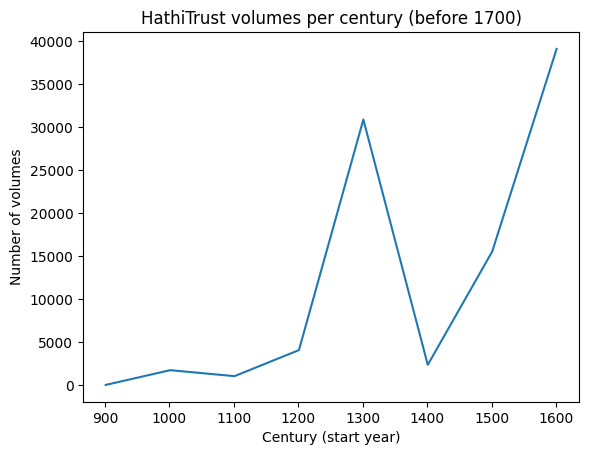

In [27]:
import matplotlib.pyplot as plt

df_plot = centuries.filter(centuries["century_start"] < 1700)

plt.figure()
plt.plot(
    df_plot["century_start"],
    df_plot["count"]
)
plt.xlabel("Century (start year)")
plt.ylabel("Number of volumes")
plt.title("HathiTrust volumes per century (before 1700)")
plt.show()


### Examples

In [36]:
import polars as pl

NEW_COLS = [
    "htid",
    "access",
    "rights",
    "ucla_id",
    "volume",
    "orig_inst",
    "oclc",
    "record_id",
    "isbn",
    "issn",
    "lccn",
    "title",
    "imprint",
    "bib_fmt",
    "last_update",
    "enumcron",
    "source_code",
    "language_raw",
    "language",
    "bib_level",
    "country",
    "orig_code",
    "catalog",
    "digitization",
    "digitization2",
    "author",
]

lf = pl.scan_csv(
    "hathi_full_20251201.txt.gz",
    separator="\t",
    has_header=False,
    quote_char=None,
    ignore_errors=True,
    infer_schema_length=0,
)

lf = lf.rename(
    {f"column_{i+1}": NEW_COLS[i] for i in range(26)}
)


In [72]:
lf_core = lf.select([
    "htid",        # unique HathiTrust volume ID
    "title",
    "author",
    "imprint",
    "bib_level",
])


In [73]:
lf_core = lf_core.with_columns(
    pl.col("imprint")
    .str.extract(r"(1[0-9]{3}|[2-9][0-9]{3})", 1)
    .cast(pl.Int32)
    .alias("year")
)


In [74]:
# take some time

df = (
    lf_core
    .filter(pl.col("year").is_not_null())
    .select("htid","title", "author", "year", "imprint")
    .collect()
)


In [75]:
df_pre1700 = (
    df
    .unique(
        subset=["htid","title", "author", "year", "imprint"],
        keep="first"
    )
    .filter(pl.col("year") < 1700)
)


In [77]:
df_pre1700 = df_pre1700.with_columns(
    ("https://hdl.handle.net/2027/" + pl.col("htid")).alias("hathi_url")
)

df_pre1700

htid,title,author,year,imprint,hathi_url
str,str,str,i32,str,str
"""ucm.5325123541""","""Prima pars Theologiae Scholast…","""Alarcon, Diego, (S.I.)""",1633,"""sumptibus Iacobi Cardon, 1633.""","""https://hdl.handle.net/2027/uc…"
"""ucm.5322474234""","""Discursos morales, a los Euang…","""Enriquez, Francisco (O. de M.)""",1638,"""En la emprenta de Antonio de V…","""https://hdl.handle.net/2027/uc…"
"""ucm.5322469913""","""La veritá suelata / discorso i…","""Romita, Othormando Evangelico.""",1676,"""[s.n.], 1676, 14 de febrero.""","""https://hdl.handle.net/2027/uc…"
"""ucm.5316531998""","""Antonii Augustini ... Emendati…","""Agustín, Antonio, 1517-1586.""",1574,"""Apud Antonium de Harsy : excud…","""https://hdl.handle.net/2027/uc…"
"""njp.32101066375567""","""Unutulmaz göz yaşları / Cafer …","""Kirimer, Cafer Seydahmet, 1889…",1334,"""Kitabhane-yi Sudi , 1334 [1918…","""https://hdl.handle.net/2027/nj…"
…,…,…,…,…,…
"""uc1.b4289789""","""Tawlīdāt-i kishāvarzī va d…",null,1358,"""Markaz, 1358 [1979]""","""https://hdl.handle.net/2027/uc…"
"""ucm.5327358032""","""Les douze clefs de philosophie…","""Valentin, Basile.""",1659,"""chez Pierre Moët ..., 1659""","""https://hdl.handle.net/2027/uc…"
"""nc01.ark:/13960/s2561wtjzz8""","""Responce du roy, faicte aux re…","""France. Sovereign (1610-1643 :…",1615,"""[publisher not identified], 16…","""https://hdl.handle.net/2027/nc…"


In [78]:
sample_links = (
    df_pre1700
    .select(["title", "author", "year", "hathi_url"])
    .sample(n=10, seed=42, with_replacement=False)
)

for row in sample_links.iter_rows(named=True):
    print(f"- {row['title']} — {row['author']} ({row['year']})")
    print(f"  {row['hathi_url']}\n")


- Sacro-historica disquisitio de duobus emblematibus quae in cimelio ... Gasparis Cardinalis Carpinei asservantur, in quorum altero praecipue disceptatur an duo Philippi imperatores fuerint christiani / auctore Ioanne Ciampino Romano ... — Ciampini, Giovanni Giustino, 1633-1698 (1691)
  https://hdl.handle.net/2027/ucm.5324262211

- al-Jild al-awwal [wa-al-Jild al-thānī] min Majmaʻ al-anhur sharḥ Multaqá al-abḥur. — Shaykhʹzādah, ʻAbd al-Raḥmān ibn Muḥammad, -1667 or 1668. (1287)
  https://hdl.handle.net/2027/hvd.hwm5q6

- De conciliis uniuersalibus tractatus ... / Didaco de Alava et Esquivel, Episcopo Cordubensia ... authore ; cum additionibus seu illustrationibus D.D. Francisci Ruiz de Vergara et Alava ... — Álava y Esquivel, Diego de, m. 1562. (1671)
  https://hdl.handle.net/2027/ucm.5326651096

- Rabindra abhidhāna / Somendranātha Basu. — Basu, Somendranātha, 1927- (1368)
  https://hdl.handle.net/2027/mdp.39015022905890

- Cronica veneta, overo succinto racconto di tutte le cose più

In [79]:
import requests
import json

HT_ID = "hvd.hwm5q6"

url = f"https://catalog.hathitrust.org/api/volumes/full/htid/{HT_ID}.json"
data = requests.get(url).json()

print(json.dumps(data, indent=2)[:2000])


{
  "records": {
    "102721386": {
      "recordURL": "https://catalog.hathitrust.org/Record/102721386",
      "titles": [
        "al-Jild al-awwal [wa-al-Jild al-th\u0101n\u012b] min Majma\u02bb al-anhur shar\u1e25 Multaq\u00e1 al-ab\u1e25ur"
      ],
      "isbns": [],
      "issns": [],
      "oclcs": [
        "25765957"
      ],
      "lccns": [],
      "publishDates": [
        "1870"
      ],
      "marc-xml": "<?xml version=\"1.0\" encoding=\"UTF-8\"?><collection xmlns:xsi=\"http://www.w3.org/2001/XMLSchema-instance\" xmlns=\"http://www.loc.gov/MARC21/slim\" xsi:schemaLocation=\"http://www.loc.gov/MARC21/slim http://www.loc.gov/standards/marcxml/schema/MARC21slim.xsd\"><record><leader>00883cam a2200241Ma 4500</leader><controlfield tag=\"001\">102721386</controlfield><controlfield tag=\"003\">MiAaHDL</controlfield><controlfield tag=\"005\">20230728000000.0</controlfield><controlfield tag=\"006\">m        d        </controlfield><controlfield tag=\"007\">cr bn ---auaua</control

In [81]:
text_url = f"https://babel.hathitrust.org/cgi/pt?id={HT_ID}&view=1up&seq=1&skin=2021&format=txt"
print(text_url)
r = requests.get(text_url)
if r.status_code == 200 and len(r.text) > 1000:
    with open(f"{HT_ID}.txt", "w", encoding="utf-8") as f:
        f.write(r.text)
    print("Full OCR text downloaded.")
else:
    print("Direct OCR text not available.")


https://babel.hathitrust.org/cgi/pt?id=hvd.hwm5q6&view=1up&seq=1&skin=2021&format=txt
Direct OCR text not available.


In [86]:
import requests

def can_extract_pdf(url):
    pdf_url = f"{url}?format=pdf"
    try:
        response = requests.head(pdf_url, allow_redirects=True, timeout=10)
        return response.status_code == 200 and 'application/pdf' in response.headers.get('Content-Type', '')
    except requests.RequestException:
        return False


In [92]:
df_pre1700.columns

['htid', 'title', 'author', 'year', 'imprint', 'hathi_url']

In [ ]:
import pandas as pd
import requests
from tqdm import tqdm

tqdm.pandas()

data = pd.DataFrame(df_pre1700.to_numpy())
data.columns = df_pre1700.columns
data = data.sample(100, random_state=42).reset_index(drop=True)



100%|██████████| 100/100 [00:41<00:00,  2.42it/s]


has_pdf
False    100
Name: count, dtype: int64

In [60]:
import polars as pl

century_dist = (
    df_pre1700
    .with_columns(
        (((pl.col("year") - 1) // 100) * 100 + 1).alias("century_start")
    )
    .group_by("century_start")
    .count()
    .sort("century_start")
)

century_dist


/var/folders/lx/9b13r6ln63jb54_3xlf9b_380000gn/T/ipykernel_13266/2790527901.py:9: DeprecationWarning: `GroupBy.count` was renamed; use `GroupBy.len` instead
  .count()


century_start,count
i32,u32
901,24
1001,1522
1101,948
1201,3411
1301,23545
1401,1661
1501,13276
1601,32133


In [61]:
# issue for the 13th century

In [ ]:
import polars as pl

approx_patterns = (
    r"c\.\s*13"
    r"|ca\.\s*13"
    r"|14\.\s*Jh"
    r"|14\s*Jh"
    r"|14th"
    r"|\[[0-9]{4}\]"
    r"|[0-9]{4}\s*\[[0-9]{4}\]"
)




total_records,approx_imprints
u32,u32
23629,13970


In [65]:
df_flagged = df_pre1700.with_columns(
    pl.col("imprint")
    .str.contains(approx_patterns)
    .alias("is_approx")
)


In [66]:
approx_by_century = (
    df_flagged
    .with_columns(
        (((pl.col("year") - 1) // 100) * 100 + 1).alias("century_start")
    )
    .group_by(["century_start", "is_approx"])
    .count()
    .pivot(
        values="count",
        index="century_start",
        columns="is_approx"
    )
    .fill_null(0)
    .sort("century_start")
)

approx_by_century


/var/folders/lx/9b13r6ln63jb54_3xlf9b_380000gn/T/ipykernel_13266/1232049519.py:7: DeprecationWarning: `GroupBy.count` was renamed; use `GroupBy.len` instead
  .count()
/var/folders/lx/9b13r6ln63jb54_3xlf9b_380000gn/T/ipykernel_13266/1232049519.py:8: DeprecationWarning: the argument `columns` for `DataFrame.pivot` is deprecated. It was renamed to `on` in version 1.0.0.
  .pivot(


century_start,true,false
i32,u32,u32
901,9,15
1001,103,1419
1101,214,734
1201,2015,1396
1301,13924,9621
1401,429,1232
1501,922,12354
1601,1883,30250


In [69]:
df_14c = df_pre1700.filter(
    (pl.col("year") >= 1300) & (pl.col("year") < 1400)
)

patterns = {
    "c_13": r"c\.\s*13",
    "ca_13": r"ca\.\s*13",
    "14_dot_Jh": r"14\.\s*Jh",
    "14_Jh": r"14\s*Jh",
    "14th": r"14th",
    "bracket_year": r"\[[0-9]{4}\]",
    "mixed_years": r"[0-9]{4}\s*\[[0-9]{4}\]",
}


pattern_counts = []

for name, regex in patterns.items():
    count = (
        df_14c
        .select(pl.col("imprint").str.contains(regex).sum())
        .item()
    )
    pattern_counts.append((name, regex, count))

pattern_dist = pl.DataFrame(
    pattern_counts,
    schema=["pattern_name", "regex", "count"]
).sort("count", descending=True)

pattern_dist


/var/folders/lx/9b13r6ln63jb54_3xlf9b_380000gn/T/ipykernel_13266/2749277851.py:26: DataOrientationWarning: Row orientation inferred during DataFrame construction. Explicitly specify the orientation by passing `orient="row"` to silence this warning.
  pattern_dist = pl.DataFrame(


pattern_name,regex,count
str,str,i64
"""bracket_year""","""\[[0-9]{4}\]""",13968
"""mixed_years""","""[0-9]{4}\s*\[[0-9]{4}\]""",13584
"""ca_13""","""ca\.\s*13""",2
"""c_13""","""c\.\s*13""",0
"""14_dot_Jh""","""14\.\s*Jh""",0
"""14_Jh""","""14\s*Jh""",0
"""14th""","""14th""",0


### Extract the Full text

In [ ]:
#https://catalog.hathitrust.org/Record/009309026

title,author,year,imprint,bracket_year
str,str,i32,str,i32
"""Daqāyiq al-ḥaqāyiq / ta'lī…","""ʻĀrifī, Aḥmad Rūmī, fl. 1…",1354,"""Shūrā-yi Ālī-yi Farhang ve…",1975
"""Ruşeni'nin rüyası.""","""Ruşeni Bey.""",1334,"""1334 [1915]""",1915
"""Ṣadā-yi mīrā 1340-1347 / taʻlī…","""Sulṭānpūr, Saʻīd.""",1347,"""IntishārĀt-i Rūz, 1347[1968]""",1968
"""Chīzī bih fardā namāndah ast /…","""Chihilʹtan, Amīr Ḥasan., چهل ت…",1381,"""Muʻasisah-i Intishārāt-i Nigāh…",2002
"""Silentium post clamores, das …","""Maier, Michael, 1568?-1622.""",1617,"""In Verlegung Lucae Iennis, im …",1617
…,…,…,…,…
"""275 rūz-i Bāzargān / navishtah…","""Bihnūd, Masʻūd., مسعود بهنود.""",1377,"""Nashr-i ʻIlm, 1377 [1998], نش …",1998
"""Kitāb al-ḥulal al-mawshīyah fī…","""Ibn al-Khaṭīb, -1374.""",1329,"""Maṭbaʻat al-Taqaddum, [1329 [1…",1911
"""320 maqalah-ʼi jughrāfiyāʼi / …","""Ganjī, Muḥammad Ḥasan.""",1353,"""Muʼassasah-ʼi Jughrāfiyāʼi va …",1974


status_code: 403
403
